In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Скачиваем датасет

In [3]:
# Load boston house proces dataset

from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
# Lets see a description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
data['target'] = boston['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Разведочный анализ данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


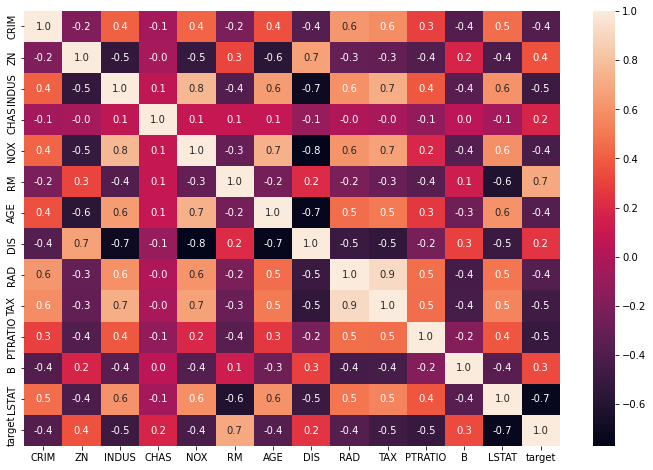

In [9]:
# Посмотрим на корреляцию между переменными
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".1f");

In [10]:
# sns.heatmap(data.corr(method='spearman'))

In [11]:
# Корреляция между независимыми признаками:
# ----------------------------------------
#    Видим, что DIS коррелирует со многими признаками
#    Также ZN коррелирует с парой других признаков (NOX, AGE)
#    Наблдаем высокую корреляцию между TAX и RAD

In [12]:
# Корреляция между независимыми и зависимой переменными:
# -----------------------------------------------------
#    Видим, что есть сильная отрицательная корреляция с признаками
#    INDUS, TAX, PTRATIO, LSTAT и сильная положительная 
#    корреляция с RM

In [13]:
# Посмотрим на scatter графики таргета с независимыми признаками

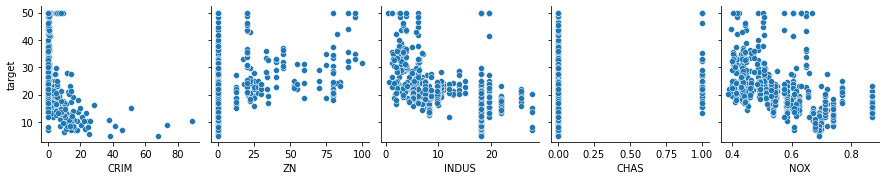

In [14]:
sns.pairplot(data, x_vars = data.columns.tolist()[:5], y_vars = 'target');

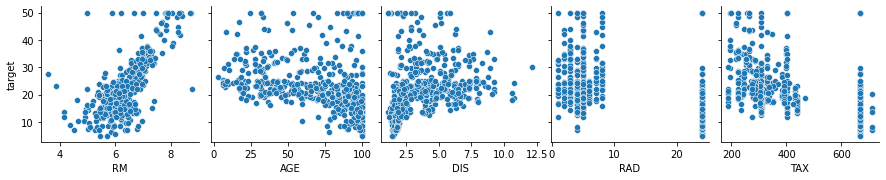

In [15]:
sns.pairplot(data, x_vars = data.columns.tolist()[5:10], y_vars = 'target');

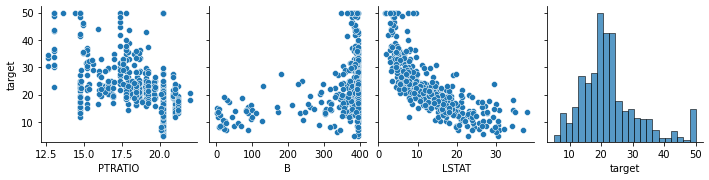

In [16]:
sns.pairplot(data, x_vars = data.columns.tolist()[10:], y_vars = 'target');

## Целевая переменная

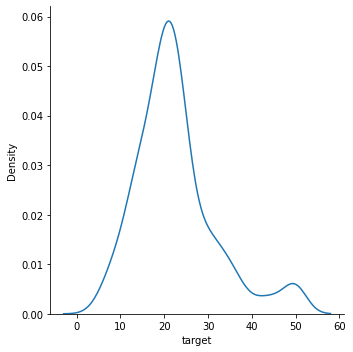

In [17]:
sns.displot(data = data.target, kind = 'kde');

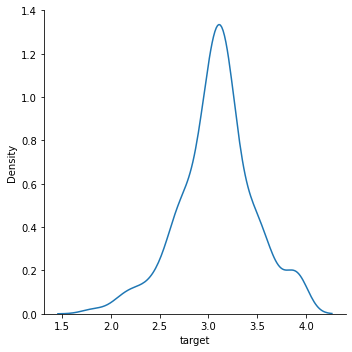

In [18]:
sns.displot(data = data.target.apply(lambda x: np.log(x+1)), kind = 'kde');

In [19]:
# Возможно стоит прологарифмировать наш таргет

## Гипотезы

1. Чем выше уровень преступности, тем ниже цена
2. Высокая доля жилых застроек приводит к большому числу квартир -> цена на квартиры ниже
3. Чем больше доля под бизнес, тем выше цена (возможно, меньшее число квартир, или просто более статусный и комфортный район с точки зрения потребления и товаров)
4. Если дом у реки, то цена выше (красивый вид)
5. Чем выше концентрация, тем меньше цена
6. Чем больше комнат, тем больше цена
7. Большая доля домов, построенных до 1940 -> дома старые -> цена меньше
8. Чем больше расстояние до центров занятости, тем цена ниже
9. Индекс доступности - чем доступнее, тем дороже
10. Высокая доля темнокожих - низкая цена на квартиры





In [ ]:
        - CRIM     уровень преступности на душу населения по городам
        - ZN       доля земель под жилую застройку зонированой под участки площадью более 25 000 кв. футов.
        - INDUS    доля акров неторгового бизнеса на город
        - CHAS     Фиктивная переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае)
        - NOX      концентрация оксидов азота (частей на 10 миллионов)
        - RM       среднее количество комнат в квартире
        - AGE      доля жилых единиц, построенных до 1940 г.
        - DIS      взвешенные расстояния до пяти центров занятости Бостона
        - RAD      индекс доступности к радиальным магистралям
        - TAX      полная ставка налога на имущество на 10 000 долларов США
        - PTRATIO  соотношение учеников и учителей по городам
        - B        1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
        - LSTAT    % более низкий статус населения
        - MEDV     Средняя стоимость домов, занимаемых владельцами, в 1000 долларов. (ТАРГЕТ ПЕРЕМЕННАЯ)

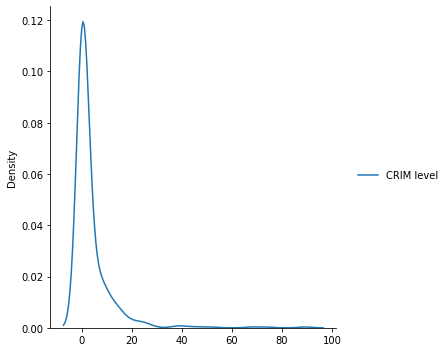

In [20]:
# Гипотеза 1
# "Чем выше уровень преступности, тем ниже цена"

sns.displot({'CRIM level' : data.CRIM}, kind = 'kde');

In [21]:
data.CRIM.nunique()

504

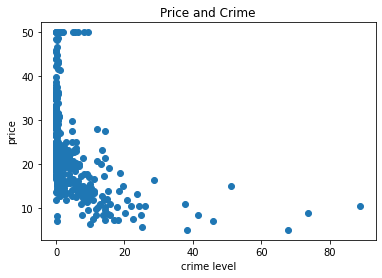

In [22]:
plt.scatter(data.CRIM, data.target)
plt.xlabel('crime level')
plt.ylabel('price')
plt.title('Price and Crime');

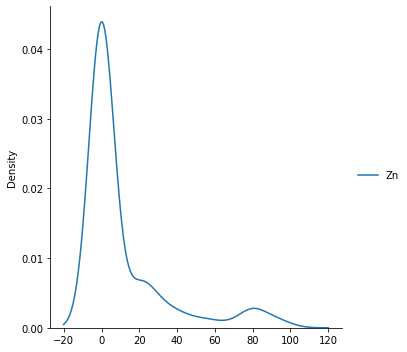

In [23]:
# Гипотеза 2
# "Высокая доля жилых застроек приводит к большому числу квартир -> цена на квартиры ниже"

sns.displot({'Zn' : data.ZN}, kind = 'kde');

In [24]:
data.ZN.nunique()

26

In [25]:
data.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [26]:
data.ZN.value_counts(normalize=True)

0.0      0.735178
20.0     0.041502
80.0     0.029644
22.0     0.019763
12.5     0.019763
25.0     0.019763
40.0     0.013834
45.0     0.011858
30.0     0.011858
90.0     0.009881
95.0     0.007905
60.0     0.007905
21.0     0.007905
33.0     0.007905
55.0     0.005929
70.0     0.005929
34.0     0.005929
52.5     0.005929
35.0     0.005929
28.0     0.005929
75.0     0.005929
82.5     0.003953
85.0     0.003953
17.5     0.001976
100.0    0.001976
18.0     0.001976
Name: ZN, dtype: float64

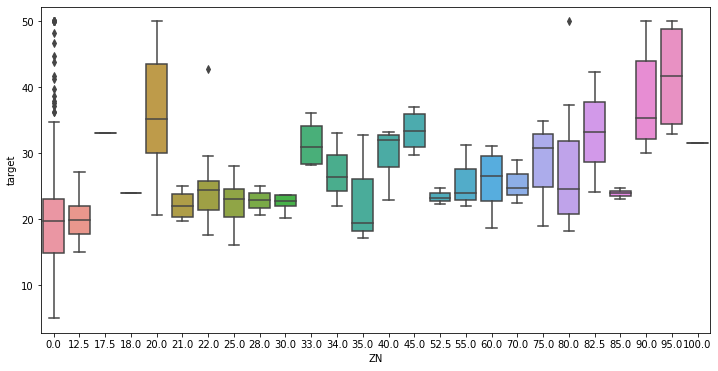

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = data, x = 'ZN', y = 'target');

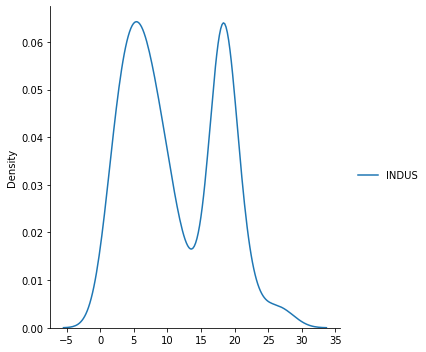

In [28]:
# Гипотеза 3
# "Чем больше доля под бизнес, тем выше цена (возможно, меньшее число квартир, или просто более статусный 
# и комфортный район с точки зрения потребления и товаров)"

sns.displot({'INDUS' : data.INDUS}, kind = 'kde');

In [29]:
data.INDUS.nunique()

76

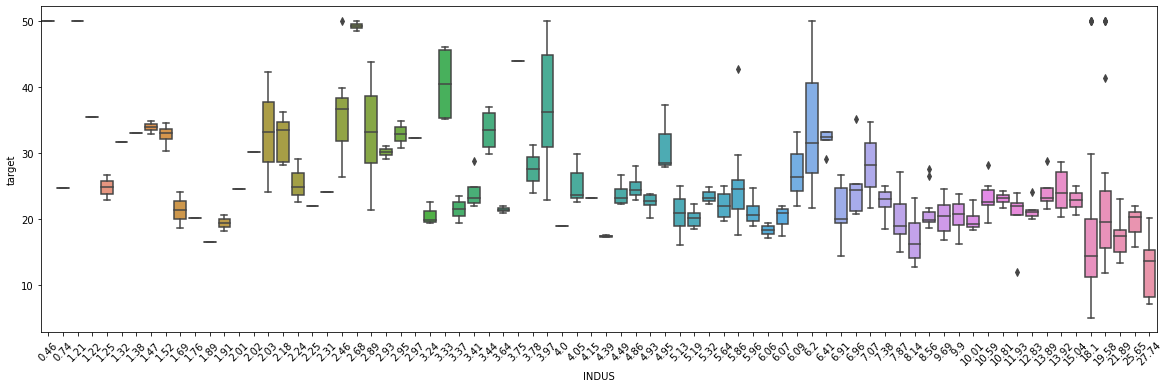

In [30]:
plt.figure(figsize=(20, 6))
plot = sns.boxplot(data = data, x = 'INDUS', y = 'target')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

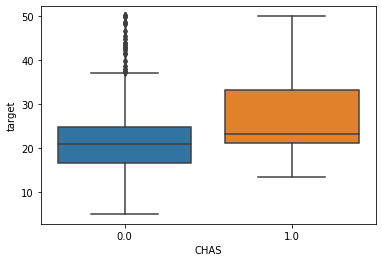

In [31]:
# Гипотеза 4
# "Если дом у реки, то цена выше (красивый вид)"

sns.boxplot(data = data, x = 'CHAS', y = 'target');

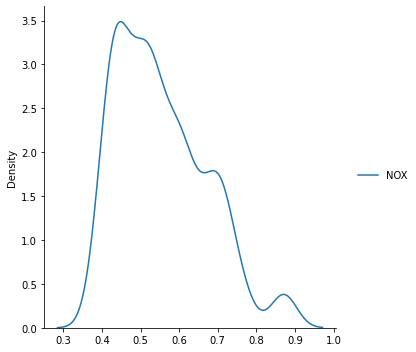

In [32]:
# Гипотеза 5
# "Чем выше концентрация, тем меньше цена"

sns.displot({'NOX' : data.NOX}, kind = 'kde');

In [33]:
data.NOX.nunique()

81

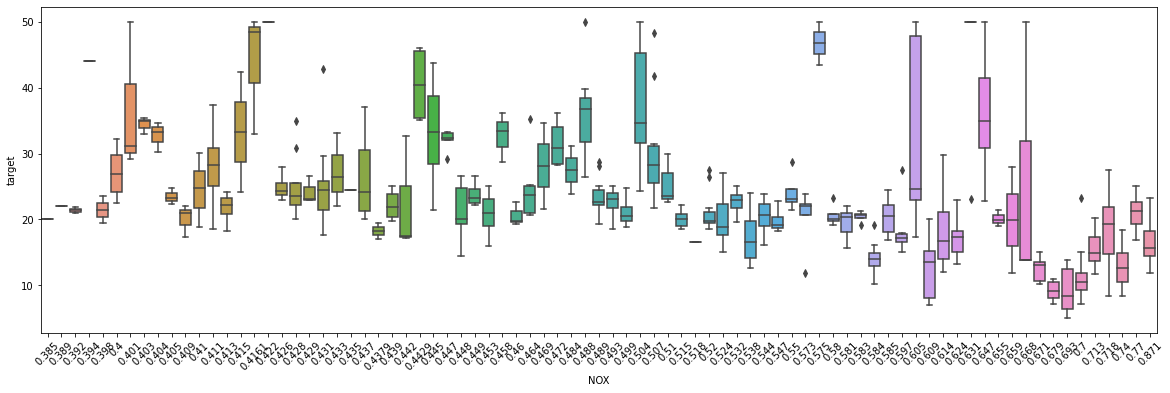

In [34]:
plt.figure(figsize=(20, 6))
plot = sns.boxplot(data = data, x = 'NOX', y = 'target')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

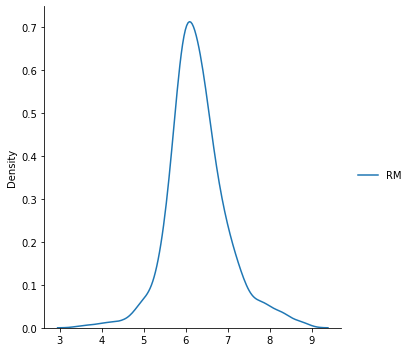

In [35]:
# Гипотеза 6
# "Чем больше комнат, тем больше цена"

sns.displot({'RM' : data.RM}, kind = 'kde');

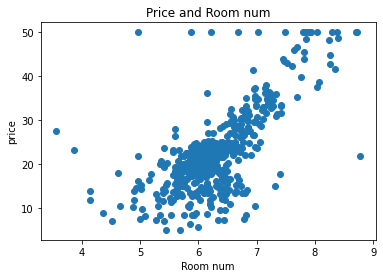

In [36]:
plt.scatter(data.RM, data.target)
plt.xlabel('Room num')
plt.ylabel('price')
plt.title('Price and Room num');

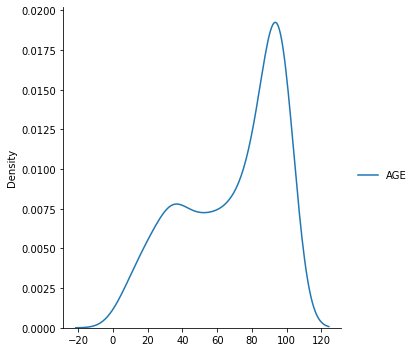

In [37]:
# Гипотеза 7
# "Большая доля домов, построенных до 1940 -> дома старые -> цена меньше"

sns.displot({'AGE' : data.AGE}, kind = 'kde');

In [38]:
data.AGE.nunique()

356

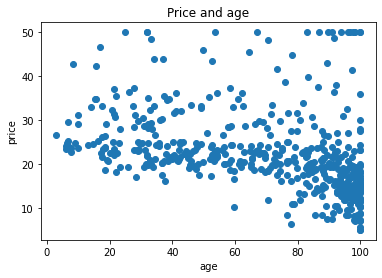

In [39]:
plt.scatter(data.AGE, data.target)
plt.xlabel('age')
plt.ylabel('price')
plt.title('Price and age');

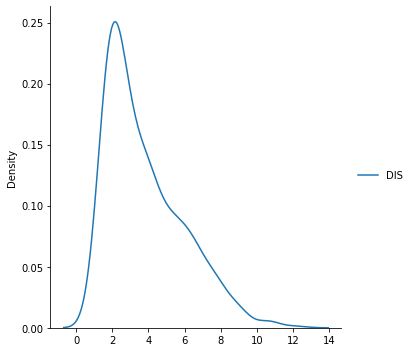

In [40]:
# Гипотеза 8
# "Чем больше расстояние до центров занятости, тем цена ниже"

sns.displot({'DIS' : data.DIS}, kind = 'kde');

In [41]:
data.DIS.nunique()

412

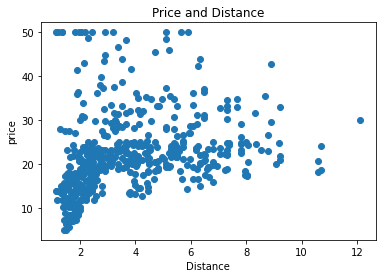

In [42]:
plt.scatter(data.DIS, data.target)
plt.xlabel('Distance')
plt.ylabel('price')
plt.title('Price and Distance');

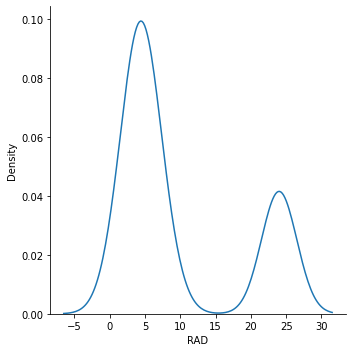

In [43]:
# Гипотеза 9
# "Индекс доступности - чем доступнее, тем дороже"

sns.displot(data.RAD, kind = 'kde')

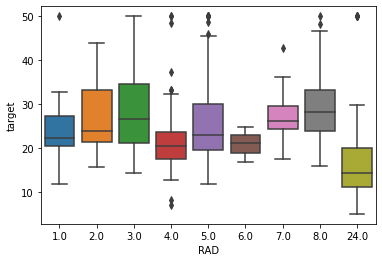

In [44]:
sns.boxplot(data = data, x = 'RAD', y = 'target');

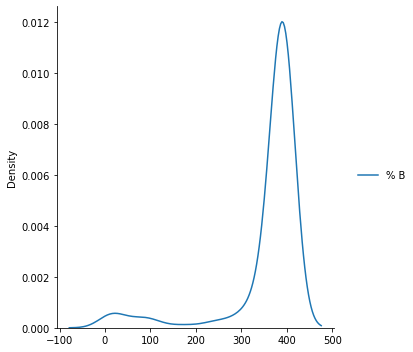

In [45]:
# Гипотеза 10
# "Высокая доля темнокожих - низкая цена на квартиры"

sns.displot({'% B' : data.B}, kind = 'kde');

In [46]:
data.B.nunique()

357

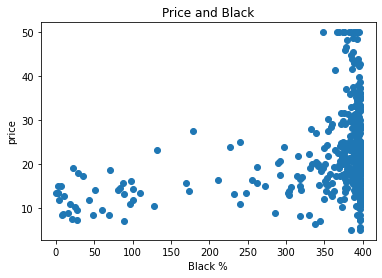

In [47]:
plt.scatter(data.B, data.target)
plt.xlabel('Black %')
plt.ylabel('price')
plt.title('Price and Black');

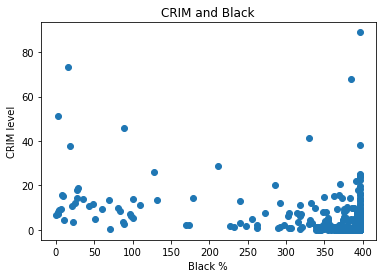

In [48]:
plt.scatter(data.B, data.CRIM)
plt.xlabel('Black %')
plt.ylabel('CRIM level')
plt.title('CRIM and Black');

# Подготовка датасетов

In [49]:
base_features = data.drop('target', axis=1).columns
base_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Добавление новых признаков

In [50]:
# Бинаризация двух признаков

In [51]:
def split_to_groups(value):
    if value <= 4.15:
        return 1
    elif value <= 15.04:
        return 2
    else:
        return 3


data['INDUS_group'] = data.INDUS.apply(lambda x: split_to_groups(x))
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,INDUS_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,2


In [52]:
def RAD_split_to_groups(value):
    if value in [1, 2, 3]:
        return 1
    elif value in [4, 5, 6]:
        return 2
    elif value in [7, 8]:
        return 3
    else:
        return 4


data['RAD_group'] = data.RAD.apply(lambda x: RAD_split_to_groups(x))
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,INDUS_group,RAD_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,2,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,2,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,2,1


## Train test split

In [53]:
categorical_features = ['INDUS_group', 'RAD_group']

In [54]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)

In [55]:
X_train = data_train.drop('target', axis=1)
X_test  = data_test.drop('target', axis=1)

y_train = data_train.target
y_test  = data_test.target

In [56]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,INDUS_group,RAD_group
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1,1
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04,2,2
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21,2,1
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,2,2
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,3,4


## Построение моделей

In [57]:
# Baseline
# Только base_features
base_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [59]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [60]:
from sklearn.model_selection import cross_validate

crossval_results = cross_validate(
    pipeline,
    X_train[base_features],
    y_train,
    scoring='neg_mean_squared_error',
    cv=5
)

np.sqrt(-1*crossval_results['test_score'].mean())

5.096839945586508

In [61]:
pipeline.fit(X_train[base_features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [62]:
y_pred = pipeline.predict(X_test[base_features])

In [63]:
from sklearn.metrics import mean_squared_error

print('MSE:', mean_squared_error(y_test, y_pred, squared=False))

MSE: 4.638689926172821


In [64]:
# добавим категориальные признаки
from category_encoders.one_hot import OneHotEncoder

pipeline = Pipeline([
    ('categ_enc', OneHotEncoder(cols=categorical_features)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [65]:
crossval_results = cross_validate(
    pipeline,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=5 
)

np.sqrt(-1*crossval_results['test_score'].mean())

5.008124403586008

In [66]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred, squared=False))

MSE: 4.5505649943554545


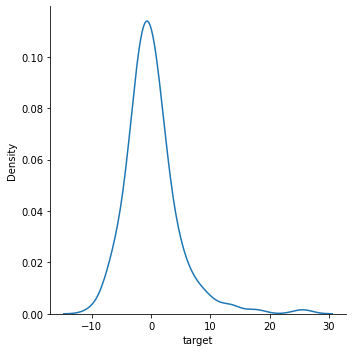

In [67]:
residuals = y_test - y_pred
sns.displot(residuals, kind='kde');

In [68]:
from sklearn.metrics import r2_score
print('R2_score:', r2_score(y_test, y_pred))

R2_score: 0.7220939271138911


In [56]:
d = {}
l = []
for feature, coef in zip(X_train.columns, pipeline['model'].coef_):
    l.append([feature, abs(coef)])

In [57]:
l.sort(key = lambda x: x[1], reverse=True)
l

[['RAD', 7.926159456699699],
 ['LSTAT', 3.70198056907243],
 ['DIS', 2.7996199711225196],
 ['RM', 2.750348787672866],
 ['NOX', 2.218656094234621],
 ['TAX', 2.019848964804908],
 ['PTRATIO', 1.5409363015082034],
 ['RAD_group', 1.1325104472686092],
 ['CRIM', 1.0951652882302485],
 ['B', 1.0442449958818332],
 ['CHAS', 0.9363268359251784],
 ['AGE', 0.5749007836720124],
 ['ZN', 0.303602598978286],
 ['INDUS_group', 0.2923948106961885],
 ['INDUS', 0.030748471864501945]]

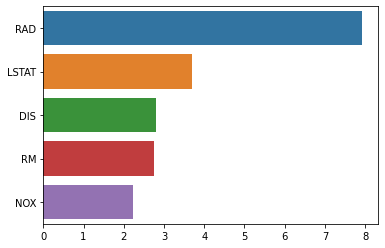

In [58]:
sns.barplot(x=[i[1] for i in l[:5]], y=[i[0] for i in l[:5]]);

In [78]:
# Попробуем градиентный бустинг
from xgboost import XGBRegressor

boosting = XGBRegressor()
pipeline_boosting = Pipeline([
    ('categ_enc', OneHotEncoder(cols=categorical_features)),
    ('scaler', StandardScaler()),
    ('model', boosting)
])

pipeline_boosting.fit(X_train, y_train)
y_pred = pipeline_boosting.predict(X_test)
print('MSE (boosting):', mean_squared_error(y_test, y_pred, squared=False))

MSE (boosting): 3.041166459945742


In [75]:
# подберем оптимальные гиперпараметры для бустинга
from sklearn.model_selection import GridSearchCV

searcher = GridSearchCV(
    pipeline_boosting,
    param_grid={
        'model__n_estimators':[100, 200, 300, 400, 500],
        'model__max_depth':[2, 3, 4, 5, 6]
    },
    scoring = 'neg_mean_squared_error',
    cv=5
)

In [76]:
searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categ_enc',
                                        OneHotEncoder(cols=['INDUS_group',
                                                            'RAD_group'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     callbacks=None,
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,

In [77]:
searcher.best_params_

{'model__max_depth': 2, 'model__n_estimators': 300}

In [80]:
boosting = XGBRegressor(n_estimators=300, max_depth=2)
pipeline_boosting = Pipeline([
    ('categ_enc', OneHotEncoder(cols=categorical_features)),
    ('scaler', StandardScaler()),
    ('model', boosting)
])

pipeline_boosting.fit(X_train, y_train)
y_pred = pipeline_boosting.predict(X_test)
print('MSE (boosting):', mean_squared_error(y_test, y_pred, squared=False))

MSE (boosting): 3.041166459945742


In [ ]:
# После того, как мы подобрали оптимальные параметры,
# вышло, что качество хуже
# Как так?

In [84]:
# Снова воспользуемся кросс-валидацией
# сначала старая модель...
boosting = XGBRegressor()
pipeline_boosting = Pipeline([
    ('categ_enc', OneHotEncoder(cols=categorical_features)),
    ('scaler', StandardScaler()),
    ('model', boosting)
])

crossval = cross_validate(
    pipeline_boosting,
    X_train,
    y_train,
    cv = 5, 
    scoring='neg_mean_squared_error'
)

np.sqrt(-1*crossval['test_score'].mean())

3.8053620843506266

In [85]:
# ... потом новая модель
boosting = XGBRegressor(n_estimators=300, max_depth=2)
pipeline_boosting = Pipeline([
    ('categ_enc', OneHotEncoder(cols=categorical_features)),
    ('scaler', StandardScaler()),
    ('model', boosting)
])

crossval = cross_validate(
    pipeline_boosting,
    X_train,
    y_train,
    cv = 5, 
    scoring='neg_mean_squared_error'
)

np.sqrt(-1*crossval['test_score'].mean())

3.6353520021907317

In [86]:
# Видим, что подбор гиперпараметров все-таки помог,
# а разница в качестве на тестовой выборке является
# частным случаем в виду каких-то особенностей
# конкретно этого тестового набора данных.
# В общем случае качество стало выше

# Pickling the model file for Deployment

In [87]:
import pickle

In [88]:
pickle.dump(pipeline_boosting, open('model.pkl', 'wb'))

In [89]:
# если мы хотим этот файл загрузить:
pickle_pipeline = pickle.load(open('model.pkl', 'rb'))

In [90]:
pickle_pipeline.fit(X_train, y_train)

Pipeline(steps=[('categ_enc', OneHotEncoder(cols=['INDUS_group', 'RAD_group'])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=300, n_jobs=0, num_parallel_tree=1,
                        

In [91]:
mean_squared_error(y_test, pickle_pipeline.predict(X_test), squared=False)

3.2090038179006974

In [92]:
# всё работает, качество такое же